# Intro to HDF5 data model

* High-level overview of the HDF5 file strudcture and basic tools


## What's HDF5?

* HDF5 = Hierarchical Data Format Version 5
* A file format optimized for numeric data
* A hierarquichal structure to store information (like folders)
* A self-describing container: Metadata + Data
* A library with several functionalities (tools)
* High level from user side (easy access) / Low level from machine side (binary, compressible)
* Fast I/O, parallel reading/writing (!), very good for HPC
* Data can be read/written in chuncks, in-memory, out-of-memory  

Read more: [https://www.hdfgroup.org/solutions/hdf5/](https://www.hdfgroup.org/solutions/hdf5/) 

## How popular is it?
* Matlab `*.m` files **are** HDF5!
* NetCDF4 files **are** HDF5!
* ICESat-2 data comes in HDF5

## Write data to HDF5

Let's create some fake data

In [6]:
import h5py
import numpy as np

x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

print(x)

[-1.07347566  1.04275726 -2.75773684 -0.3706946  -0.27678546  0.13999923
  0.30166579  0.4692472  -0.61894365 -0.9393499   0.64301394  0.12282508
 -0.91077195 -0.80393974 -0.0935877  -1.6645279  -3.00022493 -0.47794665
  0.97555131 -0.93611399  0.1596122  -1.1901774   1.26325579  1.03553332
  0.17639804  0.93975794 -0.33605734 -0.0559701   0.77566437 -1.47423617
 -0.61687274 -1.21435517  0.33045047  0.48655618 -0.74105577  1.51815813
  1.11266161 -1.02948552 -1.12693585  0.41884955  0.86083195 -0.62514834
  1.24150471  0.11103907 -1.43920646 -0.9213808   1.96013905  0.67585833
  0.09439595 -0.28114733  1.70270136 -0.73298911 -0.13060352 -0.27816071
 -0.04307338 -0.5386613  -0.47008416 -1.42218293  1.50422248 -0.03048062
 -2.09518064 -0.8417939   0.82406198 -0.14547809  0.05867108  1.74423491
 -0.83858683 -0.22341826  1.06914319 -0.21122475 -1.07629136  1.10184067
 -1.24749781 -0.22430939 -0.80351808 -0.61364457 -2.13086406 -1.49986869
 -0.21480746 -0.57619762 -0.25155627 -1.00075135 -0

Save 1D arrays to file

In [7]:
!rm myfile.h5                           # remove old file if previously written

with h5py.File('myfile.h5', 'w') as f:  # open file in write mode
    f['x'] = x                          # write data
    f['y'] = y
    f['z'] = z

In [8]:
!ls *.h5  # Check the file was created

myfile.h5


**NOTE:**  
**The HDF5 library comes with some useful command-line tools**  
**There is no need to write code to inspect an HDF5 file!**

In [9]:
!h5ls myfile.h5  # inspect the file w/command-line tools

x                        Dataset {100}
y                        Dataset {100}
z                        Dataset {100}


OBS: More sophysticated command-line tools below.


## Read data from HDF5

Load data (in memory) vs. get pointer (out of memory)

In [10]:
with h5py.File('myfile.h5', 'r') as f:  # open file
    x = f['x'][:]                       # read data into memory
    y = f['y']                          # get pointer to data on disk
    
    print('x (in mem): ', x)
    print('y (on disk):', y)
    print('')
    print('x (in mem): ', type(x))
    print('y (on disk):', type(y))
    print('')
    print('x (in mem): ', x.shape)
    print('y (on disk):', y.shape)  # same info from out-of-memory array

x (in mem):  [-1.07347566  1.04275726 -2.75773684 -0.3706946  -0.27678546  0.13999923
  0.30166579  0.4692472  -0.61894365 -0.9393499   0.64301394  0.12282508
 -0.91077195 -0.80393974 -0.0935877  -1.6645279  -3.00022493 -0.47794665
  0.97555131 -0.93611399  0.1596122  -1.1901774   1.26325579  1.03553332
  0.17639804  0.93975794 -0.33605734 -0.0559701   0.77566437 -1.47423617
 -0.61687274 -1.21435517  0.33045047  0.48655618 -0.74105577  1.51815813
  1.11266161 -1.02948552 -1.12693585  0.41884955  0.86083195 -0.62514834
  1.24150471  0.11103907 -1.43920646 -0.9213808   1.96013905  0.67585833
  0.09439595 -0.28114733  1.70270136 -0.73298911 -0.13060352 -0.27816071
 -0.04307338 -0.5386613  -0.47008416 -1.42218293  1.50422248 -0.03048062
 -2.09518064 -0.8417939   0.82406198 -0.14547809  0.05867108  1.74423491
 -0.83858683 -0.22341826  1.06914319 -0.21122475 -1.07629136  1.10184067
 -1.24749781 -0.22430939 -0.80351808 -0.61364457 -2.13086406 -1.49986869
 -0.21480746 -0.57619762 -0.25155627 -

## Append data to HDF5

Let's add some data with specific paths (groups)

In [11]:
with h5py.File('myfile.h5', 'a') as f:
    f['/path/to/data/vec'] = z**2
    f['/path/to/data/mat'] = z.reshape(10,10)
    
    # NOTE: 'path', 'to' and 'data' are groups
    # 'vec' and 'mat' are datasets

In [12]:
# Inspect file from the command line
!h5ls -r myfile.h5

/                        Group
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Now our HDF5 file has some structure!

## Add metadata to HDF5

Let's first inpect the metadata added by default

In [13]:
# Inspect Metadate from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
            }
            DATASET "vec" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
            }
         }
      }
   }
   DATASET "x" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "y" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "z" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
}
}


Let's add our own metadata

In [14]:
with h5py.File('myfile.h5', 'a') as f:
    g = f['/path']               # pointer to group 'path'
    d = f['/path/to/data/mat']   # pointer to dataset 'mat'
    
    # Metadata for the group
    g.attrs['Description'] = 'This is a group'
    g.attrs['Author'] = 'Your name'
    g.attrs['email'] = 'yourname@domain.com'
    
    # Metadata for the data
    d.attrs['Description'] = 'This is an array'
    d.attrs['Date'] = '2019-06-01'
    d.attrs['Version'] = '1.2'

In [15]:
# Inspect Metadata from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      ATTRIBUTE "Author" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "Description" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "email" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
               ATTRIBUTE "Date" {
                  DATATYPE  H5T_S

## Inspect HDF5 from Python

Let's do the same as above but using Python code

In [16]:
f = h5py.File('myfile.h5', 'r')  # keep it open

# Inspect base groups quickly
print(f.keys())

<KeysViewHDF5 ['path', 'x', 'y', 'z']>


Inspect the full structure w/metadata

In [17]:
def print_attrs(name, obj):
    print(name)
    for key,val in obj.attrs.items():
        print("    %s: %s" % (key, val))

f.visititems(print_attrs)        

path
    Author: Your name
    Description: This is a group
    email: yourname@domain.com
path/to
path/to/data
path/to/data/mat
    Date: 2019-06-01
    Description: This is an array
    Version: 1.2
path/to/data/vec
x
y
z


In [18]:
f.close()

## Create an extendable dataset

Create an empty container (called `grids`) extendable in the 3rd dim

In [19]:
with h5py.File('myfile.h5', 'a') as f:
    dset = f.create_dataset("grids", (10,10,5), maxshape=(10,10,None), dtype='f4', compression='gzip')

Check that our created container has an infinity dimension

In [20]:
!h5ls -r myfile.h5

/                        Group
/grids                   Dataset {10, 10, 5/Inf}
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Create a bunch of 2D grids to save to our empty container

In [21]:
mygrids = [np.random.randn(10,10) for _ in range(5)]

print(np.shape(mygrids))  # 5 grids of 10 by 10

(5, 10, 10)


Save grids one at a time and close the file

In [22]:
with h5py.File('myfile.h5', 'a') as f:
    grids = f['grids']
    
    for k,g in enumerate(mygrids):
        grids[:,:,k] = g

Read in (select) specific grids with fancy indexing

In [23]:
with h5py.File('myfile.h5', 'r') as f:
    mygrids = f['grids'][:,:,[0,2,4]]  # 3 grids out of 5
    
print(np.shape(mygrids))

(10, 10, 3)


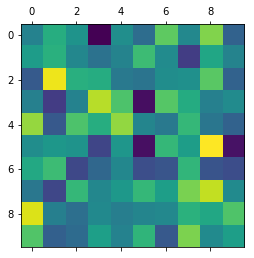

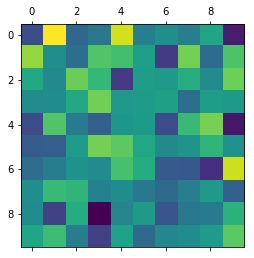

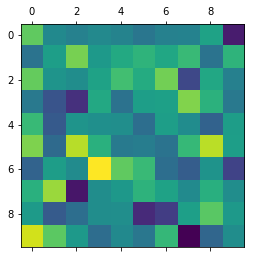

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot each grid to check dimensions are right
[plt.matshow(mygrids[:,:,k]) for k in range(mygrids.shape[2])]
plt.show()

## Final thoughts on HDF5

- Many small files is usually more practical than a few large ones
- Read/Write is faster on smaller files (faster queries)
- Network transfer is usually faster with smaller files
- Storing a lot of data into a single file is susceptible to corruption
- Many small files simplifies (embarrasingly) parallelization

---